In [32]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

mat=sio.loadmat('ex8data2.mat')
X2=mat['X']
Xval,yval=mat['Xval'],mat['yval']
X2.shape

(1000, 11)

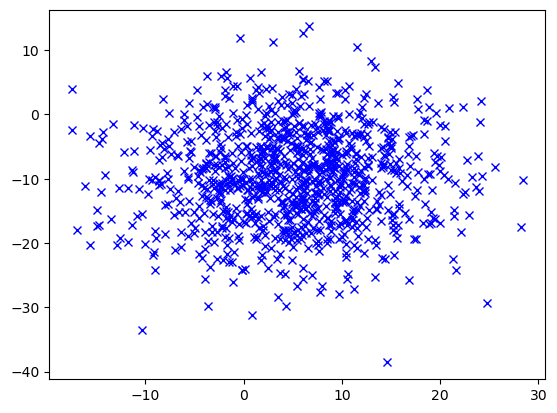

In [33]:
plt.plot(X2[:,0],X2[:,1],'bx')
plt.show()

In [34]:
def estimateGAussian(X,isCovariance):
    means=np.mean(X,axis=0)
    if isCovariance:
        sigma2=(X-means).T@(X-means)/len(X)
    else:
        sigma2=np.var(X,axis=0)
    return means,sigma2

In [35]:
def gaussian(X,means,sigma2):

    if np.ndim(sigma2)==1:
        sigma2=np.diag(sigma2)

    X=X-means
    n=X.shape[1]

    first=np.power(2*np.pi,-n/2)*(np.linalg.det(sigma2)**(-0.5))
    second=np.diag(X@np.linalg.inv(sigma2)@X.T)
    p=first*np.exp(-0.5*second)
    p=p.reshape(-1,1)

    return p

In [36]:
def plotGaussian(X,means,sigma2):
    x=np.arange(0,30,0.5)
    y=np.arange(0,30,0.5)
    xx,yy=np.meshgrid(x,y)
    z=gaussian(np.c_[xx.ravel(),yy.ravel()],means,sigma2)
    zz=z.reshape(xx.shape)
    plt.plot(X[:,0],X[:,1],'bx')
    contour_levels=[10**h for h in range(-20,0,3)]
    plt.contour(xx,yy,zz,contour_levels)

In [37]:
def selectThreshold(yval,p):
    bestEpsilon=0
    bestF1=0
    epsilons=np.linspace(min(p),max(p),1000)
    for e in epsilons:
        p_=p<e
        tp=np.sum((yval==1)&(p_==1))
        fp=np.sum((yval==0)&(p_==1))
        fn=np.sum((yval==1)&(p_==0))
        prec=tp/(tp+fp) if (tp+fp) else 0
        rec=tp/(tp+fn) if (tp+fn) else 0
        F1_e=2*prec*rec/(prec+rec) if (prec+rec) else 0
        
        if F1_e>bestF1:
            bestF1=F1_e
            bestEpsilon=e

    return bestEpsilon,bestF1

In [38]:
means,sigma2=estimateGAussian(X2,isCovariance=True)
pval=gaussian(Xval,means,sigma2)
bestEpsilon,bestF1=selectThreshold(yval,pval)
p=gaussian(X2,means,sigma2)
anoms=[X2[i] for i in range(len(X2)) if p[i] < bestEpsilon]
len(anoms)

122